In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("./data/labeled_data.csv")

In [6]:
data = df.drop(columns=["_id", "TimeStamp","PART_FACT_PLAN_DATE", "Reason", "PART_FACT_SERIAL",
                        "EQUIP_NAME", "EQUIP_CD",
                        "Mold_Temperature_1","Mold_Temperature_2","Mold_Temperature_5","Mold_Temperature_6",
                        "Mold_Temperature_7","Mold_Temperature_8","Mold_Temperature_9","Mold_Temperature_10",
                        "Mold_Temperature_11","Mold_Temperature_12","Barrel_Temperature_7","Switch_Over_Position"])

In [7]:
cn7 = data[(data["PART_NAME"] == "CN7 W/S SIDE MLD'G RH") | (data["PART_NAME"] == "CN7 W/S SIDE MLD'G LH")]

In [8]:
cn7 = cn7.replace("Y", 1).replace("N", 0)

C:\Users\Admin\AppData\Local\Temp\ipykernel_18116\2683779698.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cn7 = cn7.replace("Y", 1).replace("N", 0)


In [9]:
cn7.drop(columns=["PART_NAME"], inplace=True)

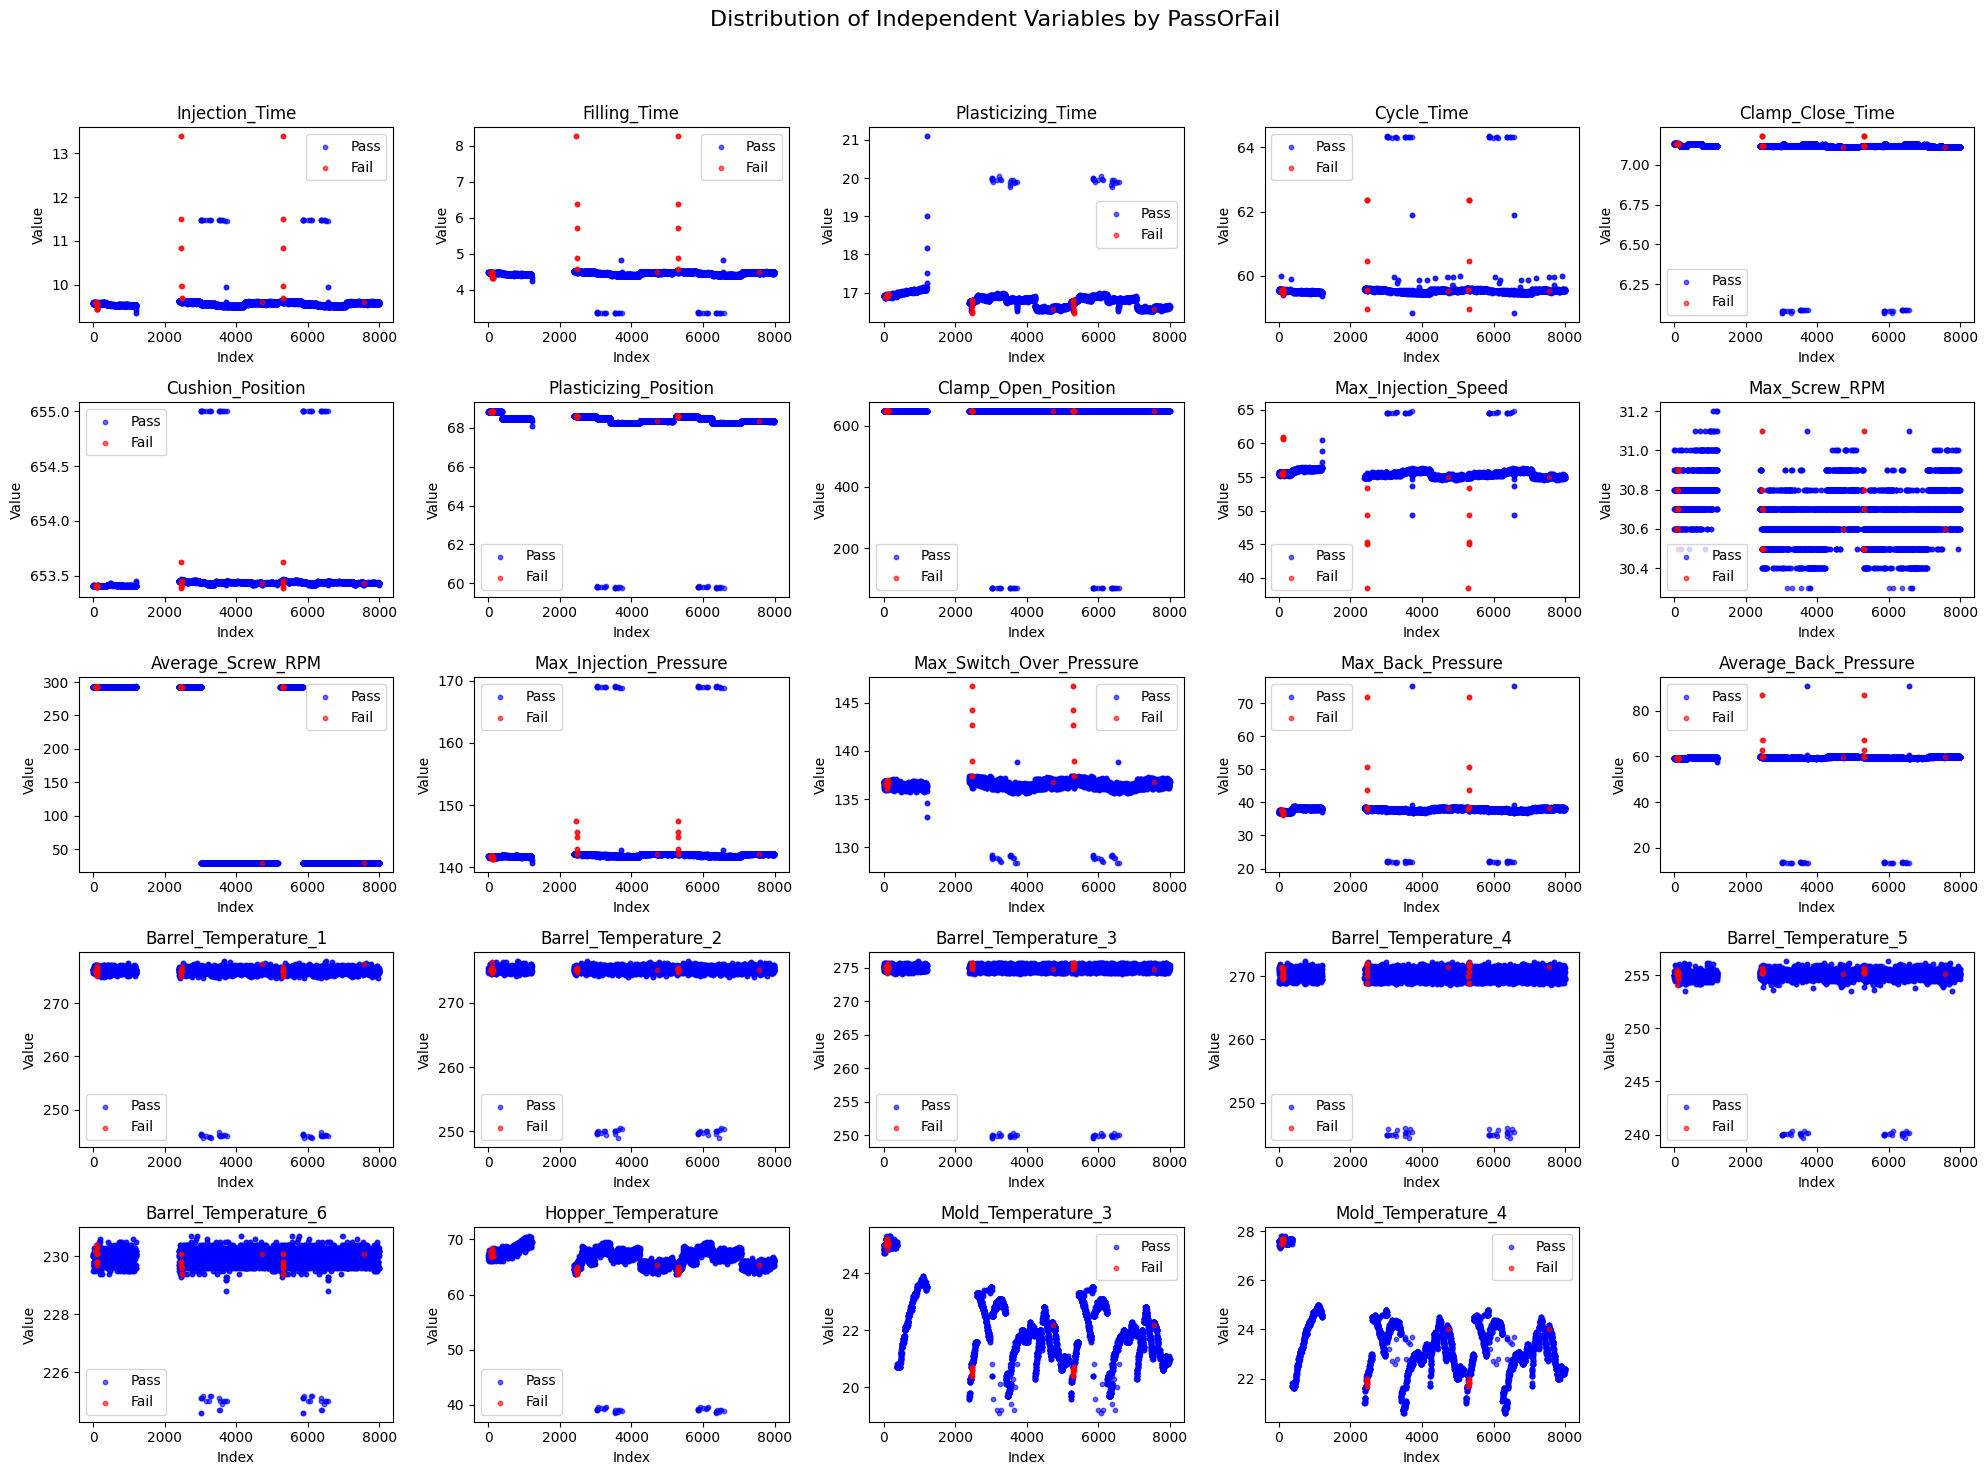

In [10]:
import matplotlib.pyplot as plt

# 독립 변수와 종속 변수 분
y = cn7["PassOrFail"]
X = cn7.drop(columns=["PassOrFail"])

# 그래프 설정
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 15))
axes = axes.flatten()
fig.suptitle("Distribution of Independent Variables by PassOrFail", fontsize=16)

# 독립 변수별 산점도 생성
for i, column in enumerate(X.columns):
    ax = axes[i]
    ax.scatter(X.index[y == 1], X[column][y == 1], label="Pass", color="blue", alpha=0.6, s=10)
    ax.scatter(X.index[y == 0], X[column][y == 0], label="Fail", color="red", alpha=0.6, s=10)
    ax.set_title(column)
    ax.set_xlabel("Index")
    ax.set_ylabel("Value")
    ax.legend()

# 빈 그래프 제거
for j in range(len(X.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


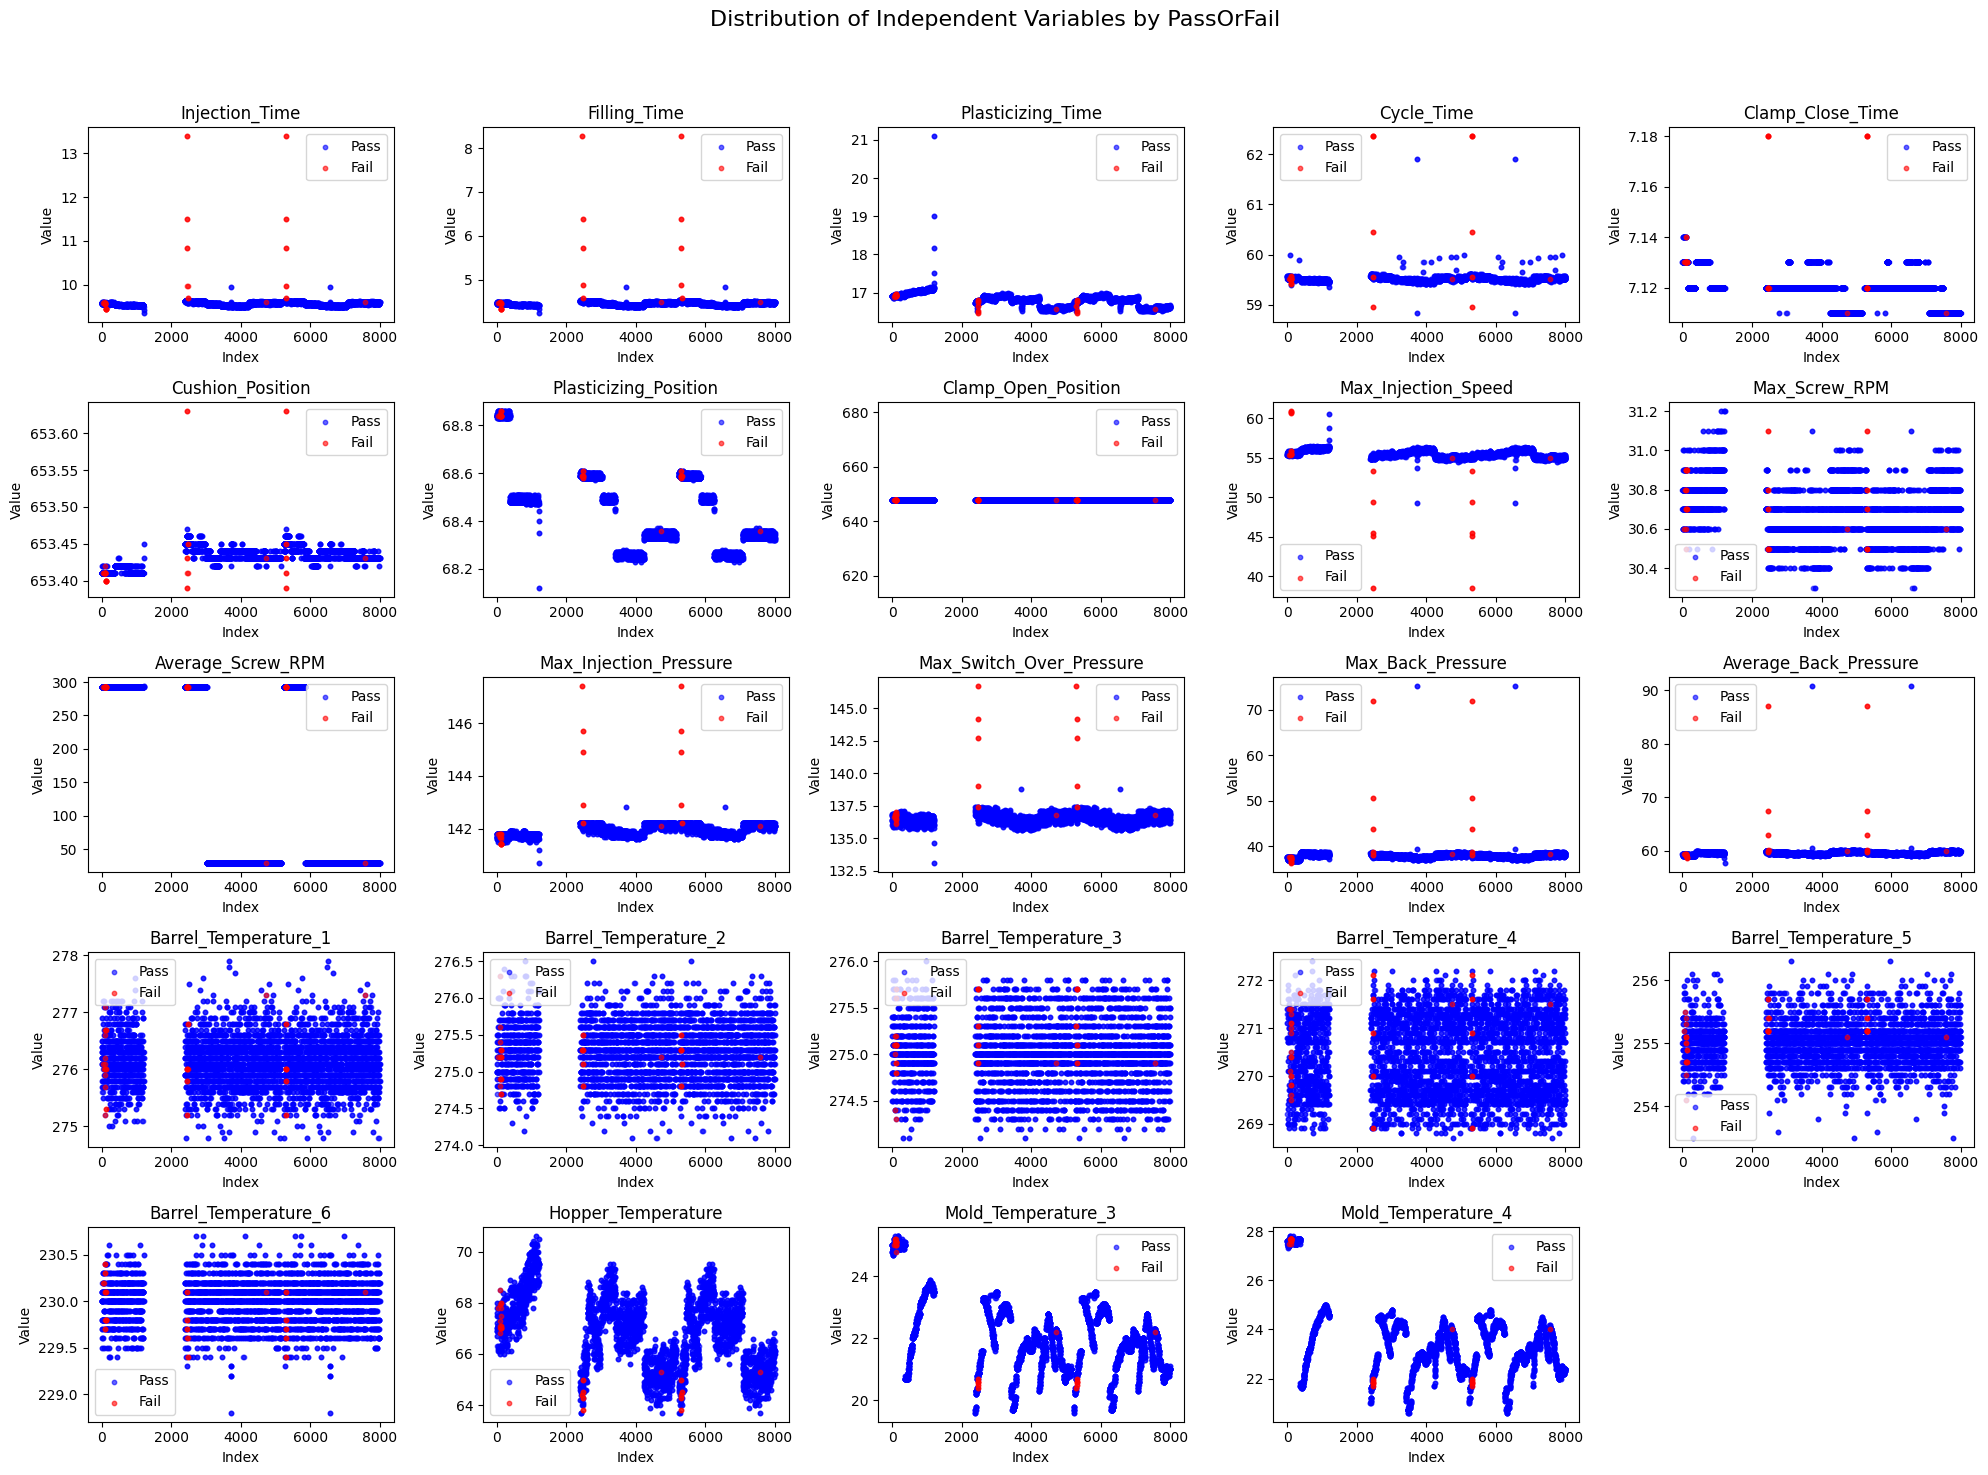

In [8]:

# 독립 변수와 종속 변수 분
cn7 = cn7[cn7["Clamp_Open_Position"] > 200]
y = cn7["PassOrFail"]
X = cn7.drop(columns=["PassOrFail"])

# 그래프 설정
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 15))
axes = axes.flatten()
fig.suptitle("Distribution of Independent Variables by PassOrFail", fontsize=16)

# 독립 변수별 산점도 생성
for i, column in enumerate(X.columns):
    ax = axes[i]
    ax.scatter(X.index[y == 1], X[column][y == 1], label="Pass", color="blue", alpha=0.6, s=10)
    ax.scatter(X.index[y == 0], X[column][y == 0], label="Fail", color="red", alpha=0.6, s=10)
    ax.set_title(column)
    ax.set_xlabel("Index")
    ax.set_ylabel("Value")
    ax.legend()

# 빈 그래프 제거
for j in range(len(X.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [9]:
cn7.columns

Index(['PassOrFail', 'Injection_Time', 'Filling_Time', 'Plasticizing_Time',
       'Cycle_Time', 'Clamp_Close_Time', 'Cushion_Position',
       'Plasticizing_Position', 'Clamp_Open_Position', 'Max_Injection_Speed',
       'Max_Screw_RPM', 'Average_Screw_RPM', 'Max_Injection_Pressure',
       'Max_Switch_Over_Pressure', 'Max_Back_Pressure',
       'Average_Back_Pressure', 'Barrel_Temperature_1', 'Barrel_Temperature_2',
       'Barrel_Temperature_3', 'Barrel_Temperature_4', 'Barrel_Temperature_5',
       'Barrel_Temperature_6', 'Hopper_Temperature', 'Mold_Temperature_3',
       'Mold_Temperature_4'],
      dtype='object')

In [10]:

def remove_outliers(df, column):
    # 1사분위수(Q1)와 3사분위수(Q3) 계산
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # IQR 계산
    IQR = Q3 - Q1
    
    # 이상치 범위 설정
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 이상치 제거
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return filtered_df


col_list = ['Injection_Time', 'Filling_Time', 'Plasticizing_Time',
           'Cycle_Time', 'Clamp_Close_Time', 'Cushion_Position',
           'Plasticizing_Position', 'Clamp_Open_Position', 'Max_Injection_Speed',
           'Max_Screw_RPM', 'Average_Screw_RPM', 'Max_Injection_Pressure',
           'Max_Switch_Over_Pressure', 'Max_Back_Pressure',
           'Average_Back_Pressure', 'Barrel_Temperature_1', 'Barrel_Temperature_2',
           'Barrel_Temperature_3', 'Barrel_Temperature_4', 'Barrel_Temperature_5',
           'Barrel_Temperature_6', 'Hopper_Temperature']

tmp = cn7.copy()

for col in col_list:
    tmp = remove_outliers(tmp, col)

    

In [11]:
tmp["PassOrFail"].value_counts()

PassOrFail
1    2890
Name: count, dtype: int64

In [12]:
tmp = cn7.copy()
tmp = remove_outliers(tmp, 'Injection_Time')
tmp["PassOrFail"].value_counts()

PassOrFail
1    6655
0      23
Name: count, dtype: int64

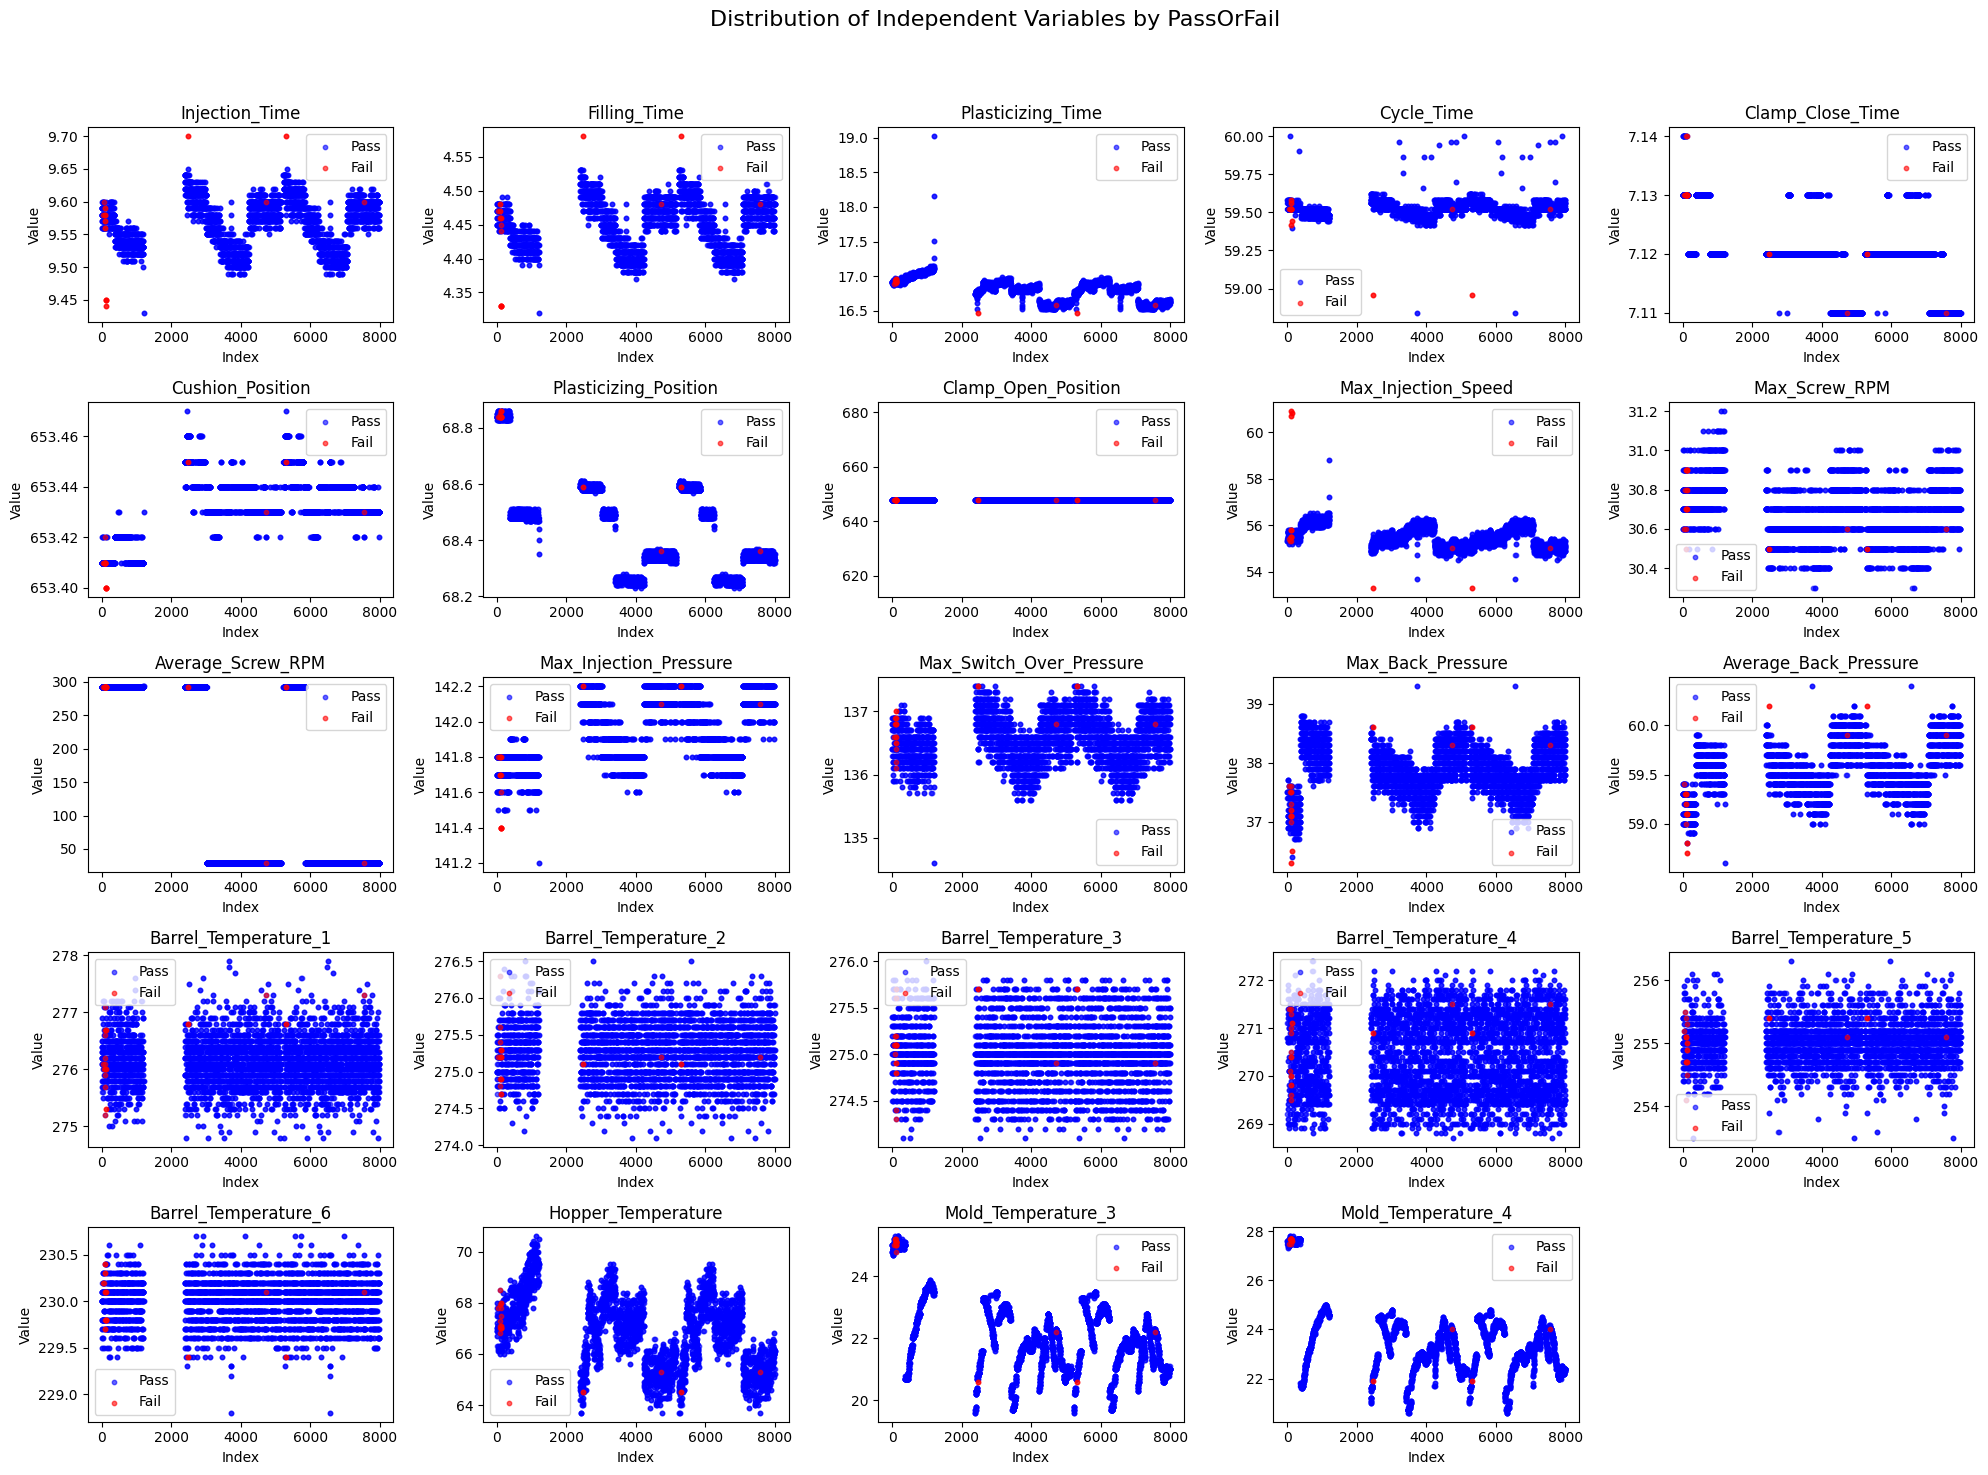

In [13]:

# 독립 변수와 종속 변수 분
y = tmp["PassOrFail"]
X = tmp.drop(columns=["PassOrFail"])

# 그래프 설정
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 15))
axes = axes.flatten()
fig.suptitle("Distribution of Independent Variables by PassOrFail", fontsize=16)

# 독립 변수별 산점도 생성
for i, column in enumerate(X.columns):
    ax = axes[i]
    ax.scatter(X.index[y == 1], X[column][y == 1], label="Pass", color="blue", alpha=0.6, s=10)
    ax.scatter(X.index[y == 0], X[column][y == 0], label="Fail", color="red", alpha=0.6, s=10)
    ax.set_title(column)
    ax.set_xlabel("Index")
    ax.set_ylabel("Value")
    ax.legend()

# 빈 그래프 제거
for j in range(len(X.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [14]:
tmp = remove_outliers(tmp, 'Plasticizing_Time')
tmp["PassOrFail"].value_counts()

PassOrFail
1    6649
0      23
Name: count, dtype: int64

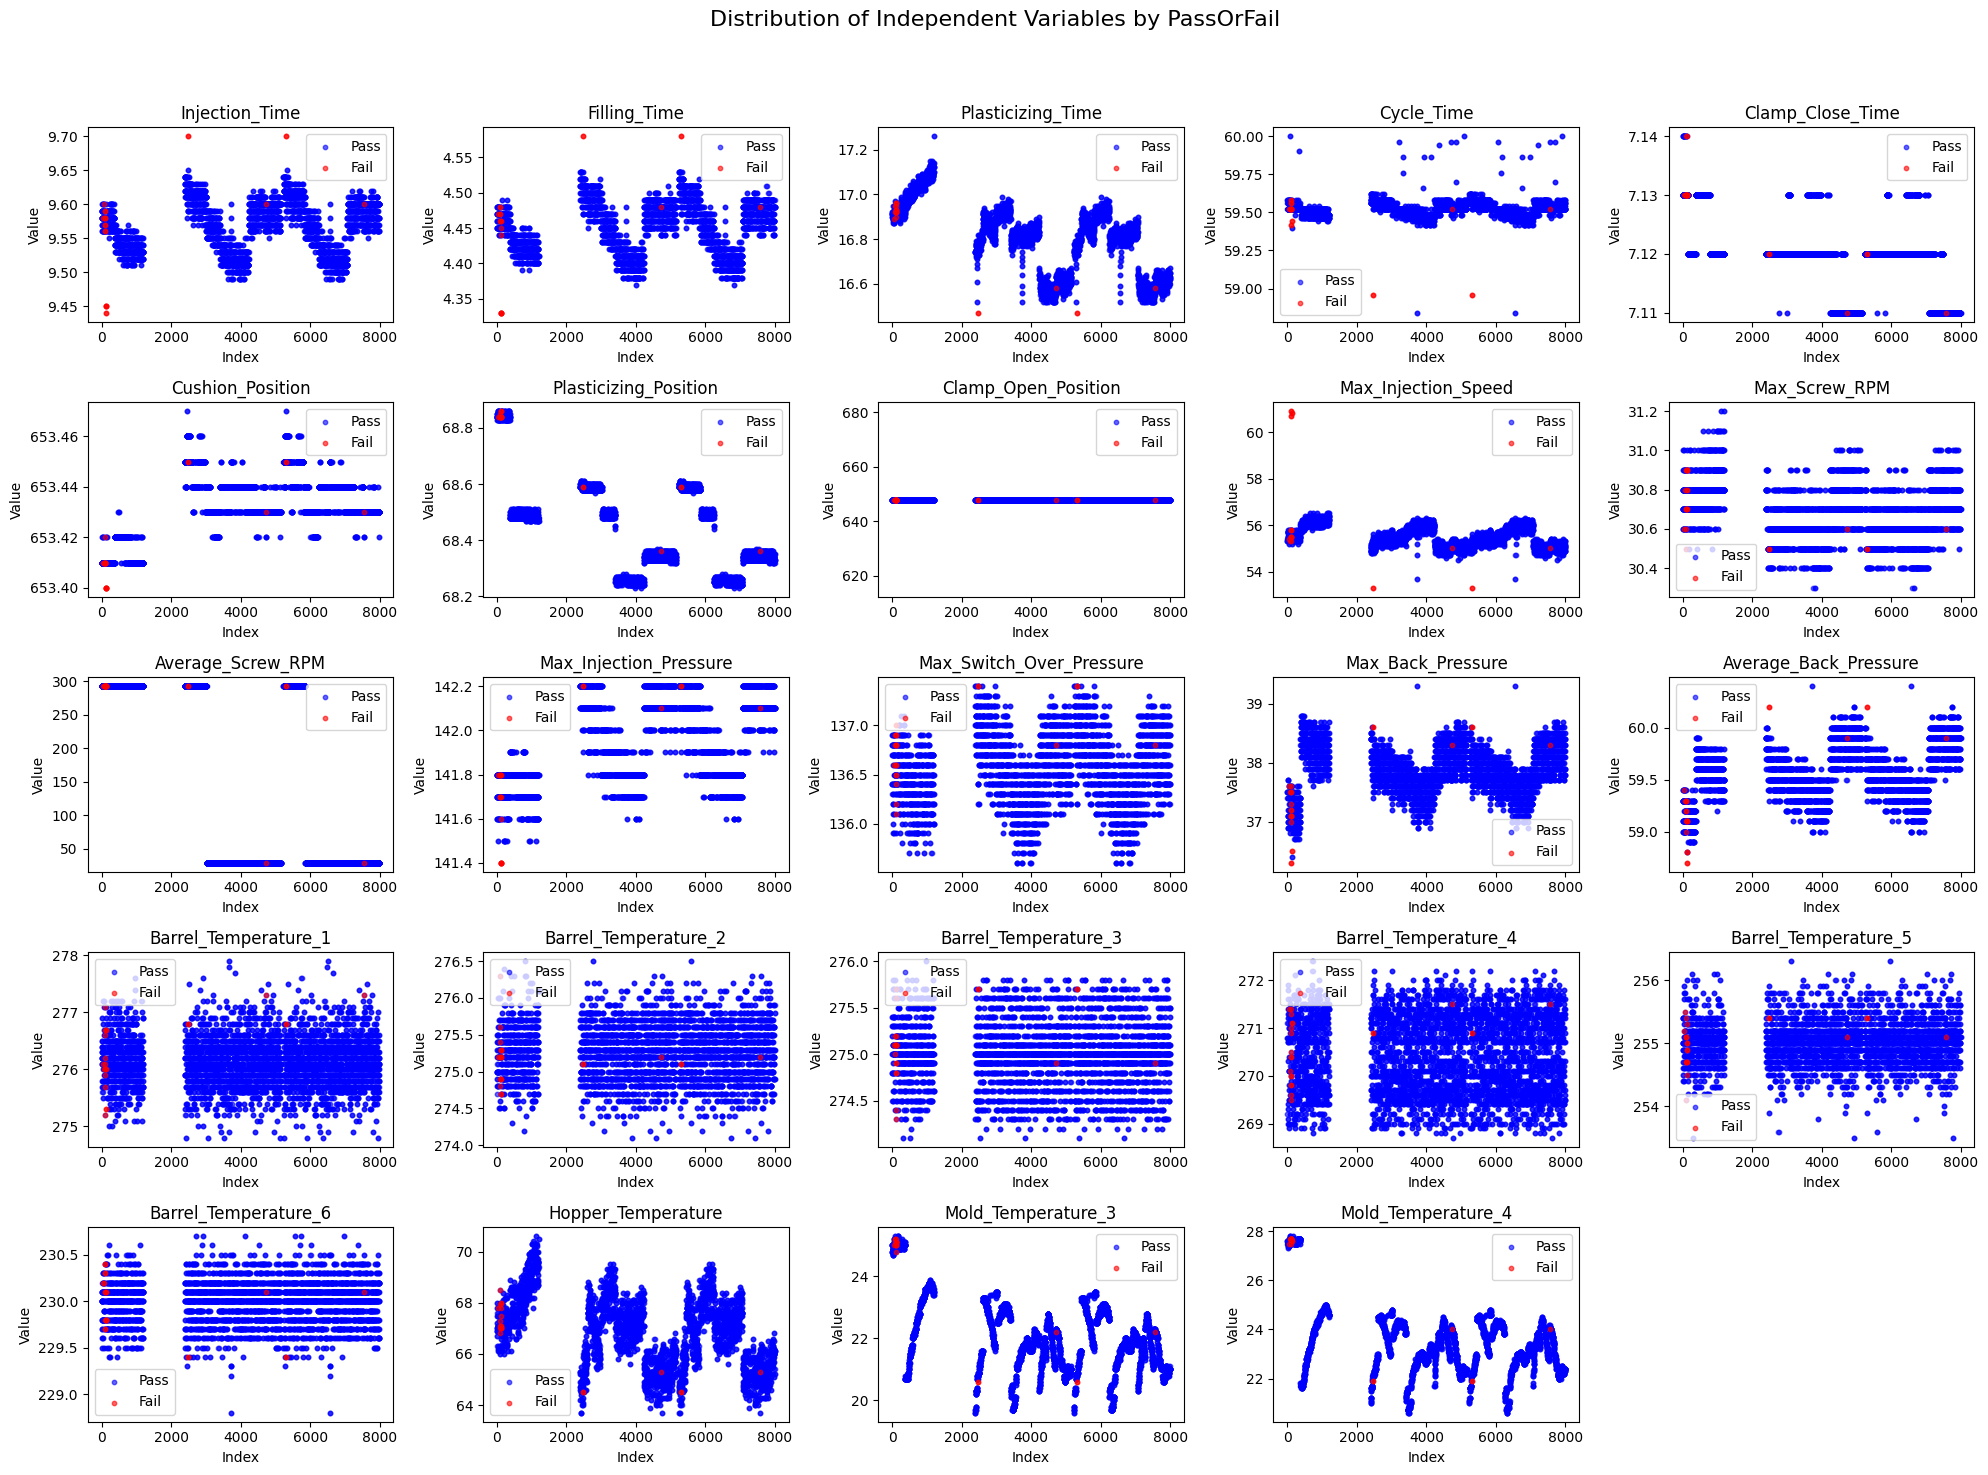

In [15]:

# 독립 변수와 종속 변수 분
y = tmp["PassOrFail"]
X = tmp.drop(columns=["PassOrFail"])

# 그래프 설정
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 15))
axes = axes.flatten()
fig.suptitle("Distribution of Independent Variables by PassOrFail", fontsize=16)

# 독립 변수별 산점도 생성
for i, column in enumerate(X.columns):
    ax = axes[i]
    ax.scatter(X.index[y == 1], X[column][y == 1], label="Pass", color="blue", alpha=0.6, s=10)
    ax.scatter(X.index[y == 0], X[column][y == 0], label="Fail", color="red", alpha=0.6, s=10)
    ax.set_title(column)
    ax.set_xlabel("Index")
    ax.set_ylabel("Value")
    ax.legend()

# 빈 그래프 제거
for j in range(len(X.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [16]:
tmp = remove_outliers(tmp, 'Cycle_Time')
tmp["PassOrFail"].value_counts()

PassOrFail
1    6597
0      19
Name: count, dtype: int64

In [17]:
cn7_removed_1 = tmp.copy()

In [18]:
tmp = remove_outliers(tmp, 'Max_Injection_Speed')
tmp["PassOrFail"].value_counts()

PassOrFail
1    6597
0      13
Name: count, dtype: int64

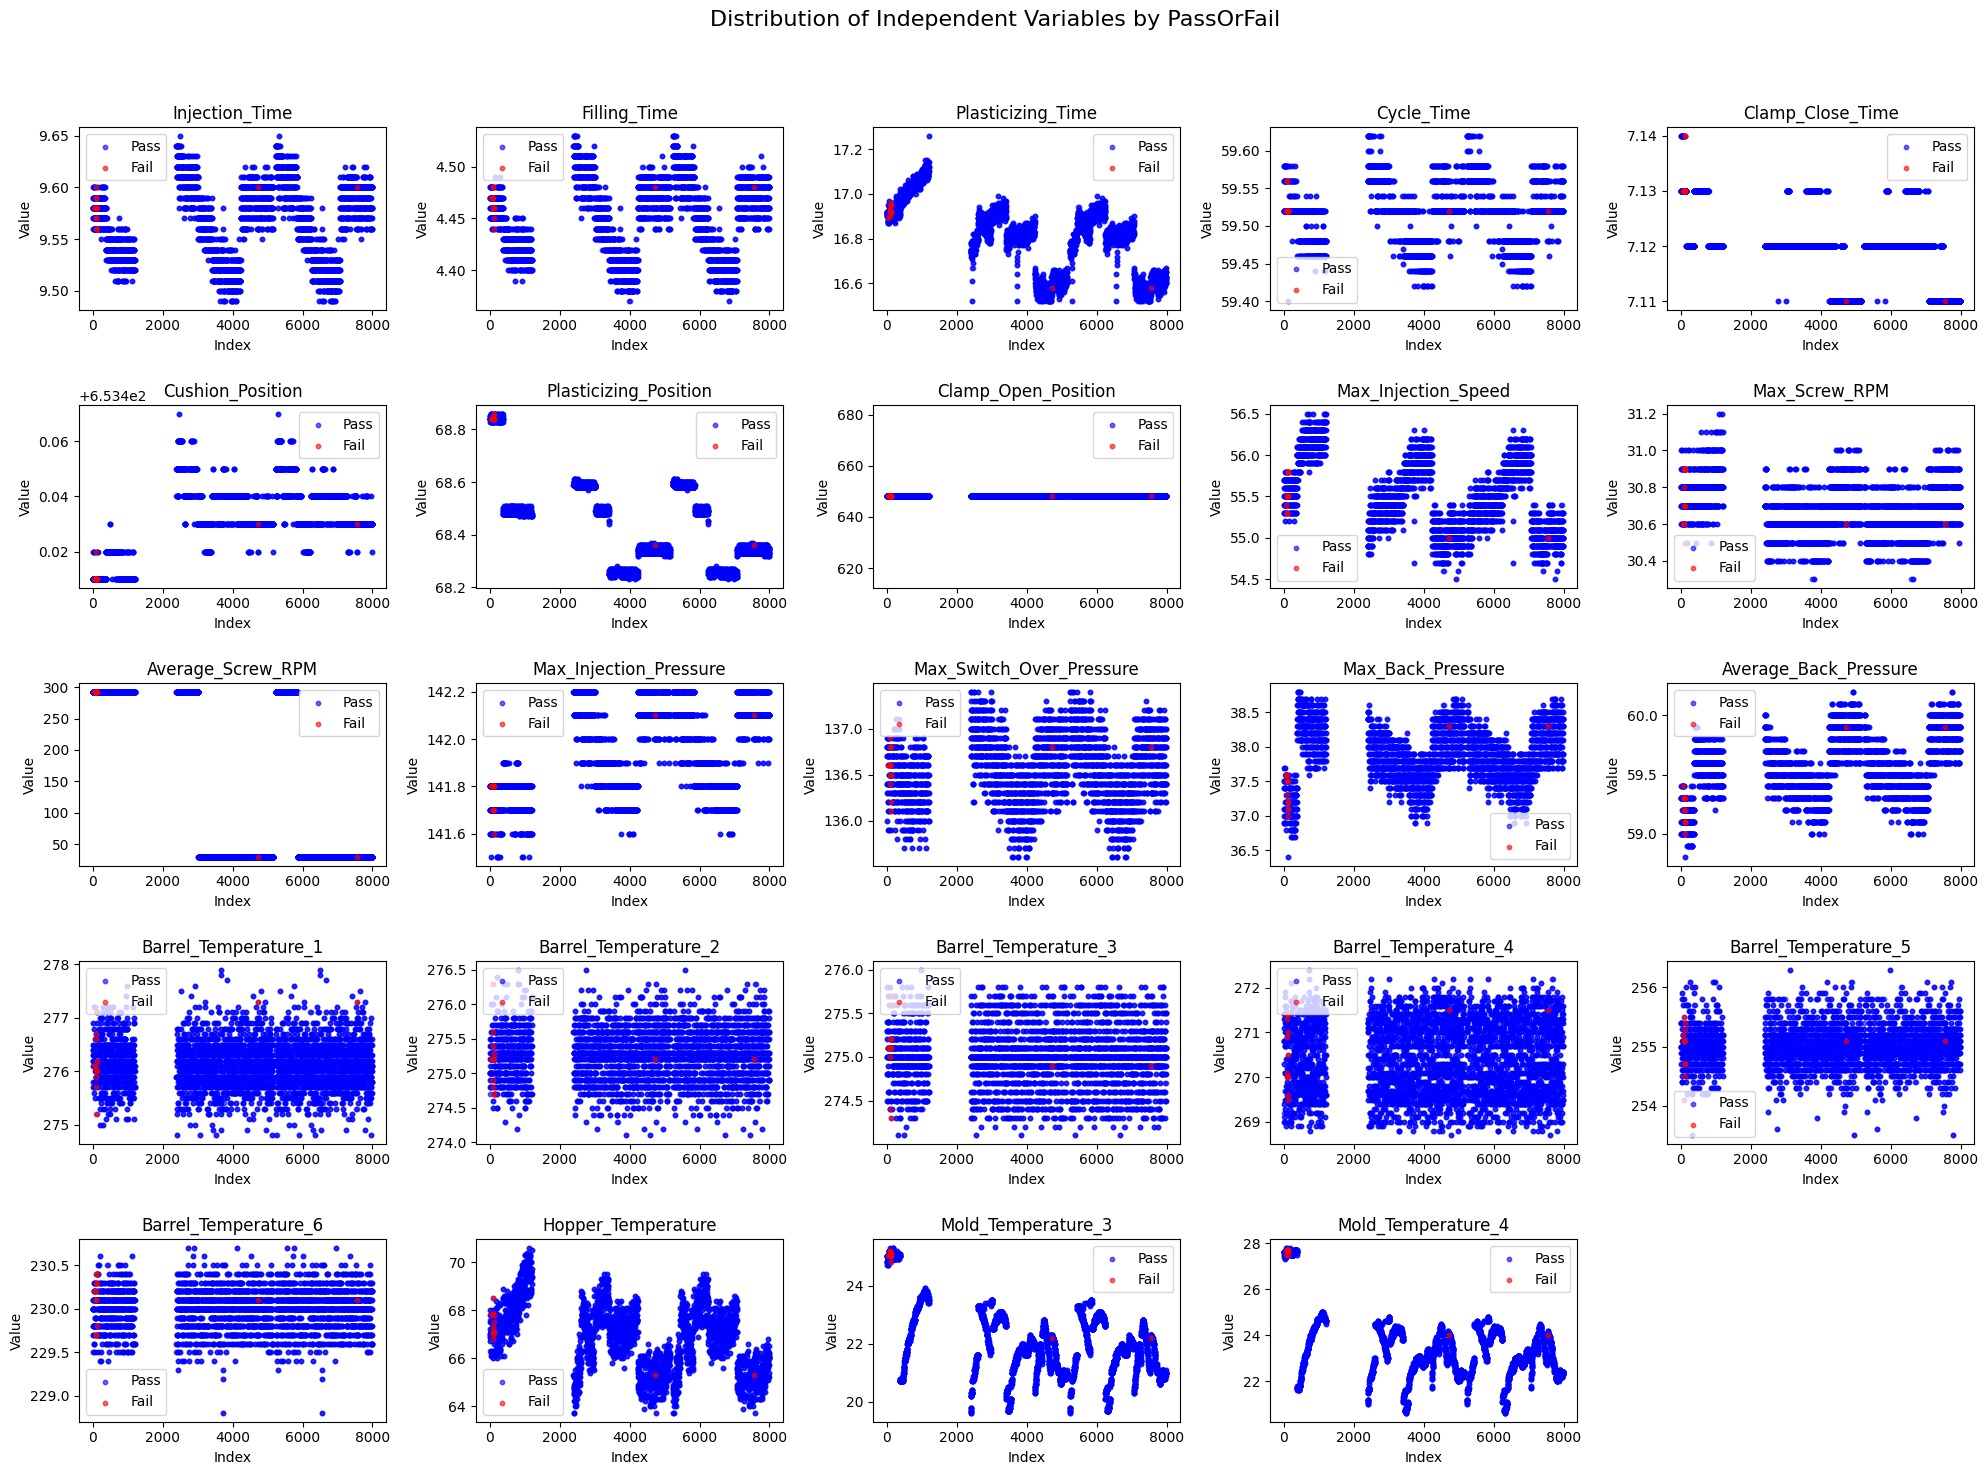

In [19]:

# 독립 변수와 종속 변수 분
y = tmp["PassOrFail"]
X = tmp.drop(columns=["PassOrFail"])

# 그래프 설정
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 15))
axes = axes.flatten()
fig.suptitle("Distribution of Independent Variables by PassOrFail", fontsize=16)

# 독립 변수별 산점도 생성
for i, column in enumerate(X.columns):
    ax = axes[i]
    ax.scatter(X.index[y == 1], X[column][y == 1], label="Pass", color="blue", alpha=0.6, s=10)
    ax.scatter(X.index[y == 0], X[column][y == 0], label="Fail", color="red", alpha=0.6, s=10)
    ax.set_title(column)
    ax.set_xlabel("Index")
    ax.set_ylabel("Value")
    ax.legend()

# 빈 그래프 제거
for j in range(len(X.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [20]:
tmp = remove_outliers(tmp, 'Mold_Temperature_3')
tmp["PassOrFail"].value_counts()

PassOrFail
1    6534
0      10
Name: count, dtype: int64

In [21]:
cn7_removed_2 = tmp.copy()

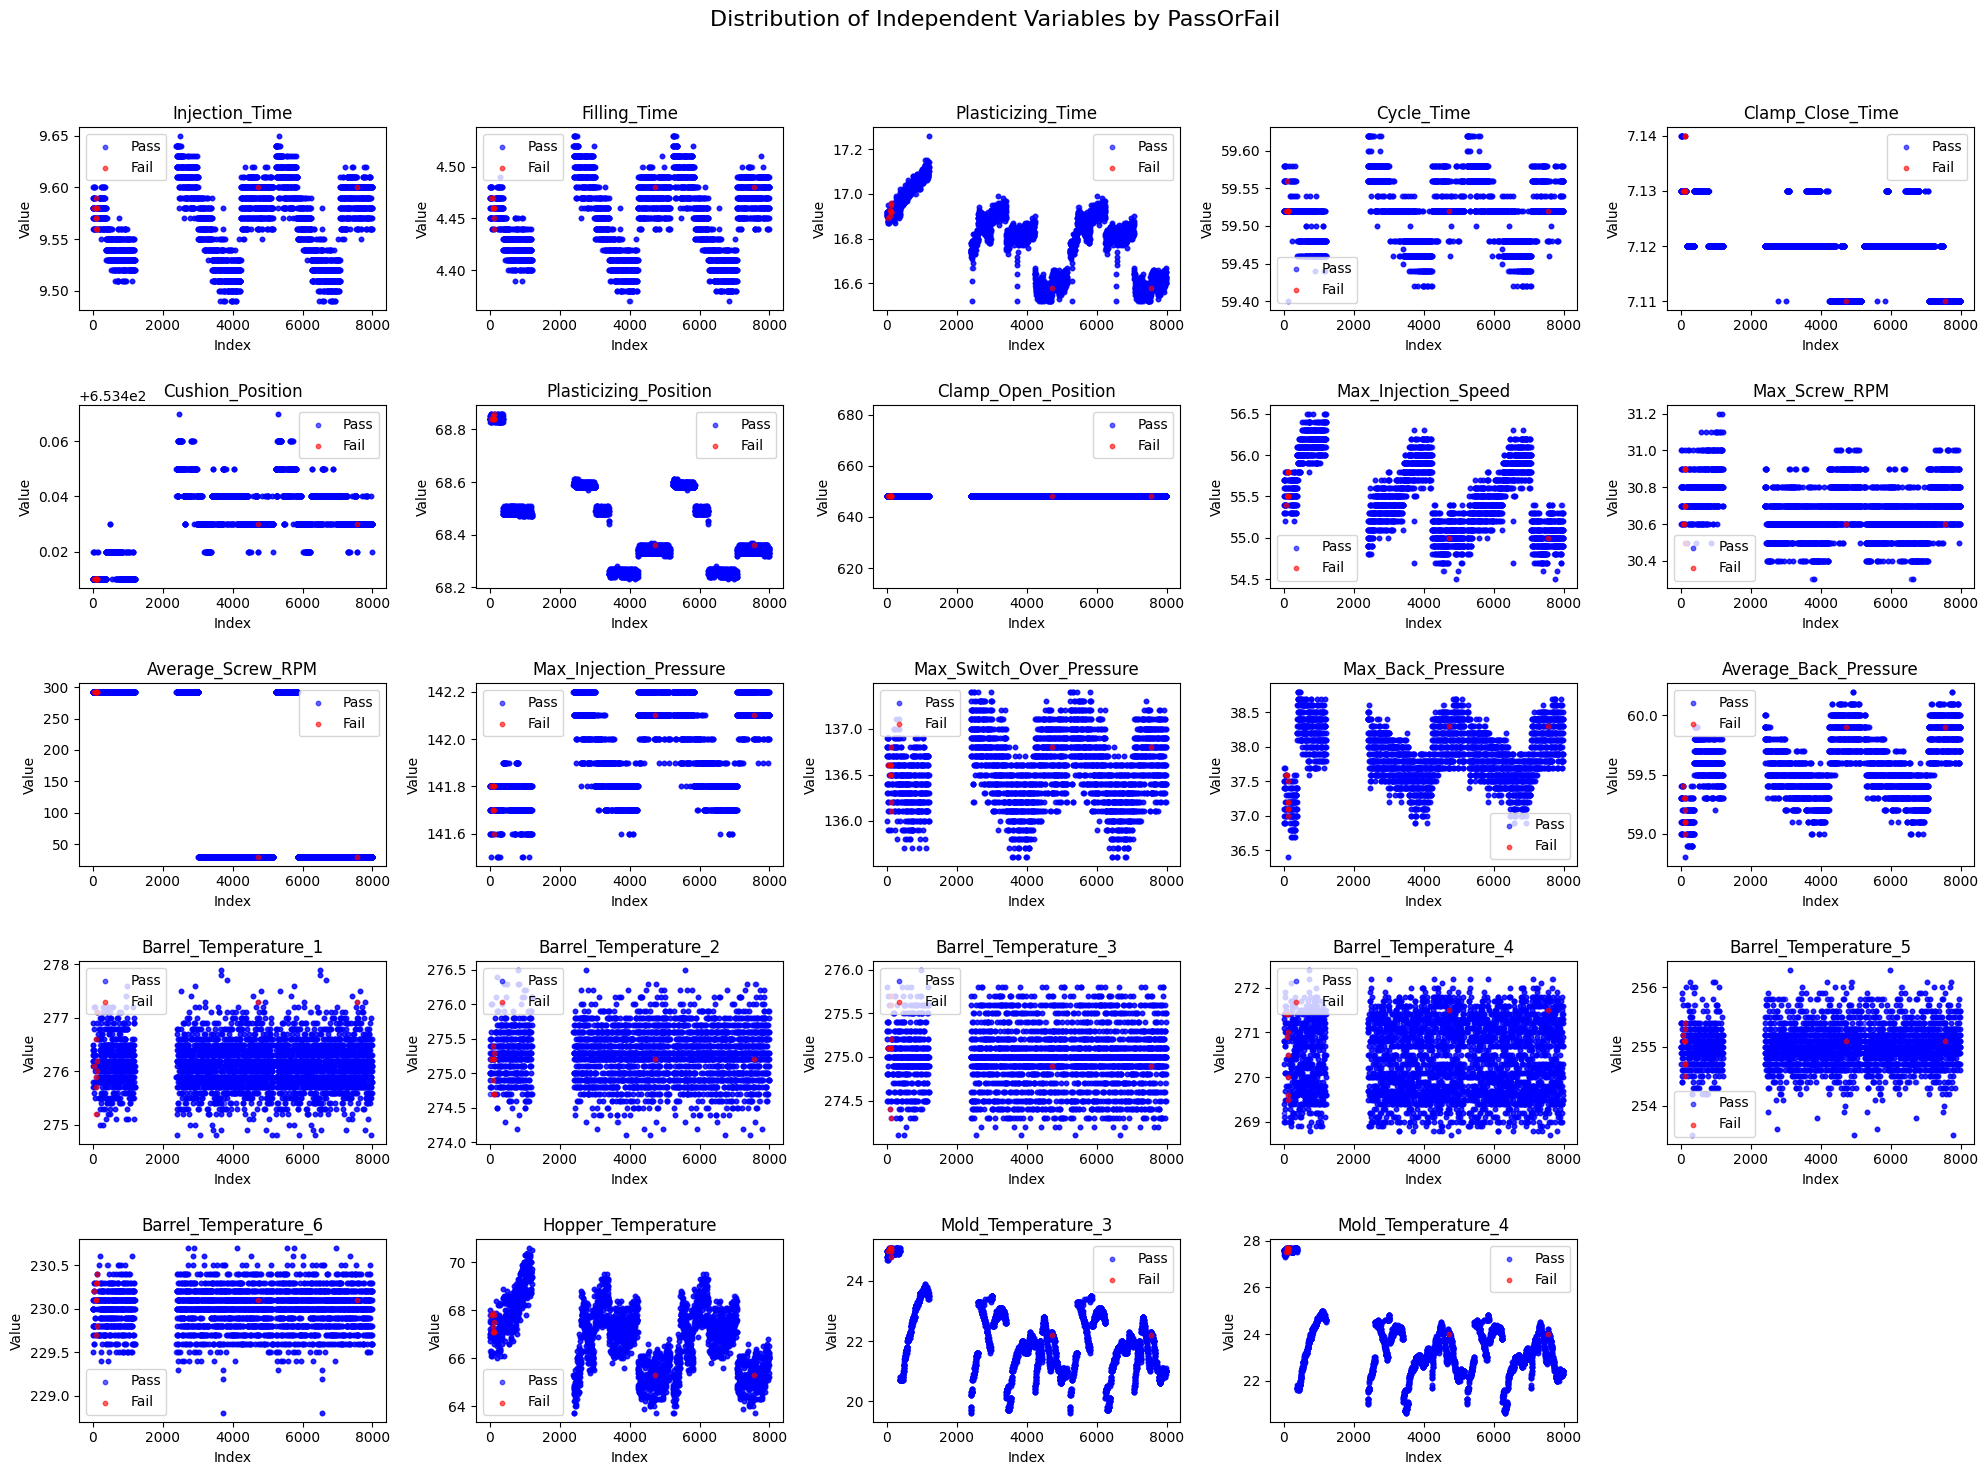

In [22]:

# 독립 변수와 종속 변수 분
y = tmp["PassOrFail"]
X = tmp.drop(columns=["PassOrFail"])

# 그래프 설정
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 15))
axes = axes.flatten()
fig.suptitle("Distribution of Independent Variables by PassOrFail", fontsize=16)

# 독립 변수별 산점도 생성
for i, column in enumerate(X.columns):
    ax = axes[i]
    ax.scatter(X.index[y == 1], X[column][y == 1], label="Pass", color="blue", alpha=0.6, s=10)
    ax.scatter(X.index[y == 0], X[column][y == 0], label="Fail", color="red", alpha=0.6, s=10)
    ax.set_title(column)
    ax.set_xlabel("Index")
    ax.set_ylabel("Value")
    ax.legend()

# 빈 그래프 제거
for j in range(len(X.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [23]:
print(cn7.shape)                          # 눈에 띄는 이상치(36개)만 제거
print(cn7_removed_1.shape)                # Cycle_Time 까지 이상치 제거 (불량 19개)
print(cn7_removed_2.shape)                # Mold_Temperature_3 까지 이상치 제거 (불량 10개)

(6700, 25)
(6616, 25)
(6544, 25)


In [25]:
cn7_pass = cn7[cn7["PassOrFail"] == 1]
cn7_fail = cn7[cn7["PassOrFail"] == 0]

In [26]:
cn7.columns

Index(['PassOrFail', 'Injection_Time', 'Filling_Time', 'Plasticizing_Time',
       'Cycle_Time', 'Clamp_Close_Time', 'Cushion_Position',
       'Plasticizing_Position', 'Clamp_Open_Position', 'Max_Injection_Speed',
       'Max_Screw_RPM', 'Average_Screw_RPM', 'Max_Injection_Pressure',
       'Max_Switch_Over_Pressure', 'Max_Back_Pressure',
       'Average_Back_Pressure', 'Barrel_Temperature_1', 'Barrel_Temperature_2',
       'Barrel_Temperature_3', 'Barrel_Temperature_4', 'Barrel_Temperature_5',
       'Barrel_Temperature_6', 'Hopper_Temperature', 'Mold_Temperature_3',
       'Mold_Temperature_4'],
      dtype='object')

In [28]:
cn7_pass_removed = cn7_pass.copy()
cn7_pass_removed = remove_outliers(cn7_pass_removed, 'Injection_Time')
cn7_pass_removed = remove_outliers(cn7_pass_removed, 'Plasticizing_Time')
cn7_pass_removed = remove_outliers(cn7_pass_removed, 'Cycle_Time')
cn7_pass_removed = remove_outliers(cn7_pass_removed, 'Max_Injection_Speed')
cn7_pass_removed = remove_outliers(cn7_pass_removed, 'Mold_Temperature_3')

In [29]:
cn7_pass_removed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6534 entries, 0 to 7995
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PassOrFail                6534 non-null   int64  
 1   Injection_Time            6534 non-null   float64
 2   Filling_Time              6534 non-null   float64
 3   Plasticizing_Time         6534 non-null   float64
 4   Cycle_Time                6534 non-null   float64
 5   Clamp_Close_Time          6534 non-null   float64
 6   Cushion_Position          6534 non-null   float64
 7   Plasticizing_Position     6534 non-null   float64
 8   Clamp_Open_Position       6534 non-null   float64
 9   Max_Injection_Speed       6534 non-null   float64
 10  Max_Screw_RPM             6534 non-null   float64
 11  Average_Screw_RPM         6534 non-null   float64
 12  Max_Injection_Pressure    6534 non-null   float64
 13  Max_Switch_Over_Pressure  6534 non-null   float64
 14  Max_Back_Pres

In [30]:
cn7_removed_3 = pd.concat([cn7_pass_removed, cn7_fail], ignore_index=True)

,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
0,1,9.59,4.47,16.920000,59.520000,7.13,653.409973,68.849998,647.98999,55.400002,...,59.299999,276.500000,274.700012,274.799988,269.200012,255.000000,229.699997,66.300003,24.799999,27.5
1,1,9.60,4.48,16.910000,59.580002,7.13,653.409973,68.839996,647.98999,55.299999,...,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.6
2,1,9.60,4.48,16.910000,59.580002,7.13,653.409973,68.839996,647.98999,55.299999,...,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.6
3,1,9.59,4.48,16.910000,59.560001,7.13,653.419983,68.839996,647.98999,55.299999,...,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.6
4,1,9.59,4.48,16.910000,59.560001,7.13,653.419983,68.839996,647.98999,55.299999,...,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6568,0,9.98,4.87,16.530001,60.459999,7.12,653.409973,68.610001,647.98999,49.400002,...,67.400002,276.000000,275.299988,275.100006,271.600006,255.199997,229.600006,65.000000,20.700001,22.0
6569,0,9.98,4.87,16.530001,60.459999,7.12,653.409973,68.610001,647.98999,49.400002,...,67.400002,276.000000,275.299988,275.100006,271.600006,255.199997,229.600006,65.000000,20.700001,22.0
6570,0,9.70,4.58,16.469999,58.959999,7.12,653.450012,68.589996,647.98999,53.299999,...,60.200001,276.799988,275.100006,275.700012,270.899994,255.399994,229.399994,64.500000,20.600000,21.9
6571,0,9.70,4.58,16.469999,58.959999,7.12,653.450012,68.589996,647.98999,53.299999,...,60.200001,276.799988,275.100006,275.700012,270.899994,255.399994,229.399994,64.500000,20.600000,21.9


In [32]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

def make_resamples(data):
    y = cn7["PassOrFail"]
    X = cn7.drop(columns=["PassOrFail"])
    
    X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=42)
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    return X_resampled, y_resampled, X_test, y_test

In [33]:

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [46]:
grid_df = pd.DataFrame()

# 독립변수 종속변수 분리 
y = cn7["PassOrFail"]
X = cn7.drop(columns=["PassOrFail"])

# 테스트 데이터 분리
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=42)

# 데이터 증강
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 검증 데이터 분리
X_train, X_val, y_train, y_val  = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# 데이터 정규화

ss=StandardScaler()
ss.fit(X_train)
X_train_scaled = ss.transform(X_train)
X_val_scaled = ss.transform(X_val)
X_test_scaled=ss.transform(X_test)

# 모델 생성
rf = RandomForestClassifier(random_state=42)
et = ExtraTreesClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
hgb = HistGradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
model_list = [rf, et, gb, hgb, xgb]

# GridSearchCV 이용해서 모든 모델 하이퍼파라미터 튜닝
for model in model_list:
    model_name = model.__class__.__name__
    gridParams = dict()
    if model_name =="XGBClassifier" :
        gridParams["n_estimators"] = [20,50]
        gridParams["max_depth"] = [10,20]
        gridParams["min_child_weight"] = [1, 2,4]
    elif model_name == "HistGradientBoostingClassifier" :
        gridParams["max_iter"] = [20, 50]
        gridParams["max_depth"] = [10, 50]
        gridParams["min_samples_leaf"] = [1,2,4]
    else :
        gridParams["n_estimators"] = [20, 50]
        gridParams["max_depth"] = [10,20]
        gridParams["min_samples_split"] = [2,5,10]
        gridParams["min_samples_leaf"] = [1,2,4]

    grid_search_model = GridSearchCV(model, gridParams, scoring='f1', cv=5, n_jobs=-1)
    grid_search_model.fit(X_train_scaled, y_train)
    model = grid_search_model.best_estimator_
    train_pred = model.predict(X_train_scaled)
    val_pred = model.predict(X_val_scaled)
    
    train_acc = accuracy_score(y_train, train_pred)
    val_acc = accuracy_score(y_val, val_pred)
    
    pre = precision_score(y_val, val_pred)
    rec = recall_score(y_val, val_pred)
    f1 = f1_score(y_val, val_pred)
    
    pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, pred)
    TN = cm[0, 0]  # True Negative
    FP = cm[0, 1]  # False Positive
    FN = cm[1, 0]  # False Negative
    TP = cm[1, 1]  # True Positive
    
    df_temp = pd.DataFrame([[model_name,  train_acc, val_acc, pre, rec, f1, train_acc-val_acc, TN, FP, FN, TP, str(grid_search_model.best_params_)]],
                             columns=["모델명", "훈련_정확도", "검증_정확도", "정밀도", "재현율", "f1-score", "훈련-검증", "TN", "FP", "FN", "TP", "파라미터"])

    grid_df = pd.concat([grid_df, df_temp], ignore_index=True)

In [47]:
grid_df

,모델명,훈련_정확도,검증_정확도,정밀도,재현율,f1-score,훈련-검증,TN,FP,FN,TP,파라미터
0,RandomForestClassifier,0.999387,0.998570,1.000000,0.997179,0.998588,0.000817,6,5,4,1995,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_..."
1,ExtraTreesClassifier,0.999694,0.999285,1.000000,0.998590,0.999294,0.000408,4,7,2,1997,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_..."
2,GradientBoostingClassifier,0.999694,0.997856,0.998588,0.997179,0.997883,0.001838,5,6,5,1994,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_..."
3,HistGradientBoostingClassifier,0.999694,0.997856,0.997183,0.998590,0.997886,0.001838,5,6,6,1993,"{'max_depth': 50, 'max_iter': 50, 'min_samples..."
4,XGBClassifier,0.999694,0.997141,0.999292,0.995063,0.997173,0.002553,5,6,8,1991,"{'max_depth': 10, 'min_child_weight': 2, 'n_es..."


In [42]:
grid_df["파라미터"][1]

"{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}"

In [43]:
from sklearn.metrics import confusion_matrix
model = ExtraTreesClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=20)
model.fit(X_train_scaled, y_train)
pred = model.predict(X_val_scaled)
confusion_matrix(y_val, pred)

array([[1378,    2],
       [   9, 1409]], dtype=int64)

In [44]:
pred = model.predict(X_test_scaled)
confusion_matrix(y_test, pred)

array([[   5,    6],
       [  11, 1988]], dtype=int64)

In [48]:
cn7.columns

Index(['PassOrFail', 'Injection_Time', 'Filling_Time', 'Plasticizing_Time',
       'Cycle_Time', 'Clamp_Close_Time', 'Cushion_Position',
       'Plasticizing_Position', 'Clamp_Open_Position', 'Max_Injection_Speed',
       'Max_Screw_RPM', 'Average_Screw_RPM', 'Max_Injection_Pressure',
       'Max_Switch_Over_Pressure', 'Max_Back_Pressure',
       'Average_Back_Pressure', 'Barrel_Temperature_1', 'Barrel_Temperature_2',
       'Barrel_Temperature_3', 'Barrel_Temperature_4', 'Barrel_Temperature_5',
       'Barrel_Temperature_6', 'Hopper_Temperature', 'Mold_Temperature_3',
       'Mold_Temperature_4'],
      dtype='object')

In [49]:
cn7["Average_Screw_RPM"]

0       292.500000
1       292.500000
2       292.500000
3       292.500000
4       292.500000
           ...    
7991     29.200001
7992     29.200001
7993     29.200001
7994     29.200001
7995     29.200001
Name: Average_Screw_RPM, Length: 6700, dtype: float64

(array([4234.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2466.]),
 array([ 29.20000076,  55.67000008,  82.13999939, 108.6099987 ,
        135.07999802, 161.54999733, 188.01999664, 214.48999596,
        240.95999527, 267.42999458, 293.8999939 ]),
 <BarContainer object of 10 artists>)

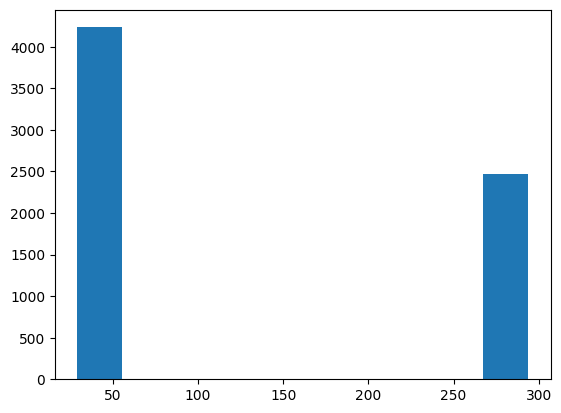

In [50]:
plt.hist(cn7["Average_Screw_RPM"])